In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
data = pd.read_csv('Medical_data.csv')
X = data.as_matrix()
print(X)
data = X[:,1:4]
y=np.empty(X.shape[0])
for i in range(X.shape[0]):
    if(X[i,0]=='HEALTHY'):
        y[i]=0
    if(X[i,0]=='SURGERY'):
        y[i]=1
    if(X[i,0]=='MEDICATION'):
        y[i]=2
print(y.shape)        
y=np.array(y,dtype='int')

[['HEALTHY' 1.6315155608144196 -0.26444658130172355 2.534567146651425]
 ['SURGERY' 0.15395105426389907 1.419533481505174 1.3331207912724836]
 ['HEALTHY' 2.021729118164318 0.26204637889999405 2.8799717380508727]
 ..., 
 ['HEALTHY' 0.19320188275265227 0.36039894430698144 1.8676445668171464]
 ['HEALTHY' 1.6840959730399991 -0.02321819895892971 3.306257682435044]
 ['MEDICATION' 0.9752179047232428 2.305958926888452 0.22982688347681815]]
(3000,)


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=20, test_size=0.2)
sss.get_n_splits(data, y)
for train_index, test_index in sss.split(data, y):
    train, y_train = data[train_index], y[train_index]
    test, y_test = data[test_index], y[test_index]

In [5]:
x=np.arange(3,10,4)
acc_tr=[]
acc=[]
for i in x:
    lab=np.zeros(i)
    kmeans = KMeans(n_clusters = i)
    preds_tr=kmeans.fit_predict(train)
    preds=kmeans.predict(test)
    print(preds_tr)
    for j in range(i):
        lab[j]=np.bincount(y_train[(preds_tr==j)]).argmax()  
    acc_tr.append(np.sum(y_train==lab[preds_tr])/y_train.shape)
    acc.append(np.sum(y_test==lab[preds])/y_test.shape)
    

[2 0 0 ..., 2 0 2]
[6 0 4 ..., 4 4 1]


/home/khushal/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


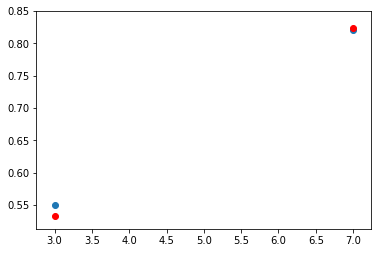

In [11]:
fig,ax=plt.subplots()
ax.scatter(list(x),acc_tr)
ax.scatter(list(x),acc,color='r')
fig.show()

In [70]:
print(train.shape)

(2400, 3)


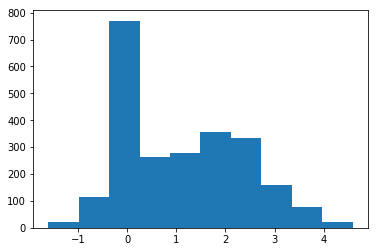

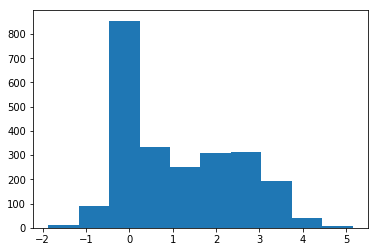

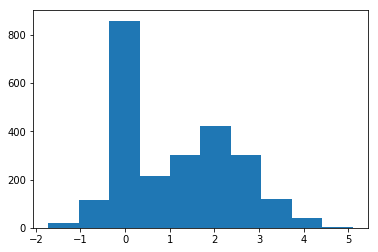

In [10]:
%matplotlib inline
for i in range(train.shape[1]):
    fig,ax=plt.subplots()
    plt.hist(list(train[:,i]))
                           

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
clf = GaussianNB()
clf.fit(train,y_train)
acc_tr=np.sum(y_train==clf.predict(train))/y_train.shape
acc=np.sum(y_test==clf.predict(test))/y_test.shape
print(acc,acc_tr)

[ 0.91833333] [ 0.90583333]
